In [ ]:
# %pip install matplotlib
# %pip install seaborn
# %pip install pyfonts

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os, sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..')) 

# Add the project root to sys.path
sys.path.insert(0, project_root)

In [ ]:
import time
import re
from jiwer import wer, cer
from nltk.translate.bleu_score import corpus_bleu
from transliterator.transliteration import Transliterator
from transformers import AutoTokenizer, AutoModelForMaskedLM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, confusion_matrix

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load transliteration model
# model_directory = "Ransaka/sinhala-bert-medium-v2" #Base Model
model_directory = "E:/4th Year/FYP/IMPLEMENTATION/models"
dictionary_path = "E:/4th Year/FYP/IMPLEMENTATION/data/dictionary.txt"

tokenizer = AutoTokenizer.from_pretrained(model_directory)
model = AutoModelForMaskedLM.from_pretrained(model_directory)
model.eval()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 786, padding_idx=0)
      (position_embeddings): Embedding(256, 786)
      (token_type_embeddings): Embedding(2, 786)
      (LayerNorm): LayerNorm((786,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=786, out_features=786, bias=True)
              (key): Linear(in_features=786, out_features=786, bias=True)
              (value): Linear(in_features=786, out_features=786, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=786, out_features=786, bias=True)
              (LayerNorm): LayerNorm((786,), eps=1e-12, elementwise

In [3]:
transliterator = Transliterator(
    dictionary_path=dictionary_path, tokenizer=tokenizer, model=model
)

# Generating Sinhala for IndoNLP test data

In [ ]:
def classify_line(line):
    """Classify the line as Romanized, Sinhala, or blank."""
    line = line.strip()

    if not line:
        return "Blank"

    if any('\u0D80' <= char <= '\u0DFF' for char in line):
        return "Sinhala"

    return "Romanized"

In [ ]:
# Open the input file and read the content
with open('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/Original_Datasets/Sinhala Test set 2.txt', 'r', encoding='utf-8') as file:
    # Read the lines from the file
    lines = file.readlines()


# Open a new file to write the filtered pairs
with open('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/base_model/base_model_results_test2.txt', 'w', encoding='utf-8') as output_file:

    # Variables to hold Romanized and Sinhala pairs
    romanized_sentence = None
    sinhala_sentence = None

    # Loop through the lines and classify them
    for i, line in enumerate(lines, start=1):
        classification = classify_line(line)

        if classification == "Romanized":
            romanized_sentence = line.strip()  # Store the Romanized line
        elif classification == "Sinhala":
            sinhala_sentence = line.strip()  # Store the Sinhala line

        # If both Romanized and Sinhala sentences are identified
        if romanized_sentence and sinhala_sentence:
            # Count the number of words in the Romanized sentence
            word_count = len(romanized_sentence.split())

            output_file.write(f"Romanized Input: {romanized_sentence}\n")
            output_file.write(f"Expected Sinhala: {sinhala_sentence}\n")


            time_start = time.time()
            output = transliterator.generate_sinhala(re.sub(r'\s+', ' ', romanized_sentence).strip())
            time_end = time.time()

            time_taken = time_end - time_start

            output_file.write(f"Generated Sinhala: {output}\n")
            output_file.write(f"Time taken: {time_taken} seconds\n")

            print(f"Romanized Input: {romanized_sentence}")
            print(f"Expected Sinhala: {sinhala_sentence}")
            print(f"Generated Sinhala: {output}\n")
            print(f"Time taken: {time_taken} seconds\n")

            output_file.write("\n")  # Write a blank line for readability

            # Reset the variables after processing the pair
            romanized_sentence = None
            sinhala_sentence = None


Romanized Input: mta eka prshnyk ahanna puluwn nm awulak ne
Expected Sinhala: මට එක ප්‍රශ්නයක් අහන්න පුළුවන් නම් අවුලක් නෑ
Generated Sinhala: මට එක ප්‍රශ්නයක් අහන්න පුළුවන් නම් අවුලක් නෑ

Time taken: 3.8363113403320312 seconds

Romanized Input: hondyi eka modyi wge
Expected Sinhala: හොඳයි, ඒක මෝඩයි වගේ
Generated Sinhala: හොඳයි ඒක මෝඩයි වගේ

Time taken: 0.14004731178283691 seconds

Romanized Input: kmk nehe modyi wge
Expected Sinhala: කමක් නැහැ මෝඩයි වගේ
Generated Sinhala: කමක් නැහැ මෝඩයි වගේ

Time taken: 0.13711977005004883 seconds

Romanized Input: kmk nehe oba eyta kemthi nownu etha
Expected Sinhala: කමක් නැහැ ඔබ එයට කැමති නොවනු ඇත
Generated Sinhala: කමක් නැහැ ඔබ එයට කැමති නොවනු ඇත

Time taken: 0.566370964050293 seconds

Romanized Input: oba eyta kemthi nownu etha eya asanna
Expected Sinhala: ඔබ එයට කැමති නොවනු ඇත, එය අසන්න
Generated Sinhala: ඔබ එයට කැමති නොවනු ඇත එය අසන්න

Time taken: 0.9740514755249023 seconds

Romanized Input: eya wda honda deyi asanna
Expected Sinhala: එය වඩා හොඳ

# AKURU Testing - IndoNLP Datasets

In [6]:
def evaluate_results(file_path):

  # Initialize lists to store expected and generated Sinhala sentences
  ground_truth = []
  generated_output = []

  # Read and parse the file
  with open(file_path, 'r', encoding='utf-8') as file:
      for line in file:
          # Check if the line contains 'Expected Sinhala' or 'Generated Sinhala'
          if line.startswith("Expected Sinhala:"):
              # Extract the expected Sinhala sentence
              expected_sentence = line.split("Expected Sinhala:")[1].strip()
              ground_truth.append(expected_sentence)
          elif line.startswith("Generated Sinhala:"):
              # Extract the generated Sinhala sentence
              generated_sentence = line.split("Generated Sinhala:")[1].strip()
              generated_output.append(generated_sentence)



  # WER and CER
  word_error_rate = wer(ground_truth, generated_output)
  character_error_rate = cer(ground_truth, generated_output)
  print(f"WER: {word_error_rate}")
  print(f"CER: {character_error_rate}\n")

  #BLEU
  ground_truth = [[ref.split()] for ref in ground_truth]  # Wrap each reference in a list for corpus_bleu
  generated_output = [hyp.split() for hyp in generated_output]  # Tokenize each hypothesis

  # Calculate BLEU score
  bleu_score1 = corpus_bleu(ground_truth, generated_output, weights=(1.0, 0, 0, 0))
  bleu_score2 = corpus_bleu(ground_truth, generated_output, weights=(0.5, 0.5, 0, 0))
  bleu_score3 = corpus_bleu(ground_truth, generated_output, weights=(0.3, 0.3, 0.3, 0))
  bleu_score4 = corpus_bleu(ground_truth, generated_output, weights=(0.25, 0.25, 0.25, 0.25))


  print(f"BLEU-1: {bleu_score1}")
  print(f"BLEU-2: {bleu_score2}")
  print(f"BLEU-3: {bleu_score3}")
  print(f"BLEU-4: {bleu_score4}")

## Test set 1 - Base Model

In [ ]:
evaluate_results('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/base_model/base_model_results_test1.txt')


WER: 0.08875530990142855
CER: 0.02026454661734182

BLEU-1: 0.9113419643662423
BLEU-2: 0.8717360555407159
BLEU-3: 0.8487473928469819
BLEU-4: 0.7963036120710866


## Test set 2 - Base Model

In [ ]:
evaluate_results('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/base_model/base_model_results_test2.txt')


WER: 0.09173415019634042
CER: 0.021619888220382983

BLEU-1: 0.9084363648210592
BLEU-2: 0.8683016339558708
BLEU-3: 0.8449066997794281
BLEU-4: 0.791392069976667


## Test set 1 - Fine-Tuned Model

In [ ]:
evaluate_results('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/fine_tuned_model/fine_tuned_model_results_test1')


WER: 0.08674615800954552
CER: 0.019984222176267396

BLEU-1: 0.913342571107631
BLEU-2: 0.8735192512794279
BLEU-3: 0.8499166289804805
BLEU-4: 0.7968374215805081


## Test set 2 - Fine-Tuned Model

In [ ]:
evaluate_results('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/fine_tuned_model/fine_tuned_model_results_test2')


WER: 0.09026770729799749
CER: 0.0214549674739639

BLEU-1: 0.9099335374991855
BLEU-2: 0.8687924020927317
BLEU-3: 0.8444602663324771
BLEU-4: 0.7896838567429783


# Benchmarking - IndoNLP Datasets

In [7]:
def evaluate_benchmark_results(ground_truth_file, results_file):
    # Initialize lists to store expected and generated Sinhala sentences
    ground_truth = []
    generated_output = []

    # Read and parse the file
    with open(ground_truth_file, 'r', encoding='utf-8') as file:
        for line in file:
            # Check if the line contains 'Expected Sinhala' or 'Generated Sinhala'
            if classify_line(line) == "Sinhala":
                # Extract the expected Sinhala sentence
                expected_sentence = line.strip()
                ground_truth.append(expected_sentence)

    # Read and parse the file
    with open(results_file, 'r', encoding='utf-8') as file:
        for line in file:
            # Check if the line contains 'Expected Sinhala' or 'Generated Sinhala'
            if classify_line(line) == "Sinhala":
                # Extract the expected Sinhala sentence
                generated_sentence = line.strip()
                generated_output.append(generated_sentence)

    # print(f"Length of Ground Truth: {len(ground_truth)}")
    # print(f"Length of Generated Output: {len(generated_output)}")
    # print(f"Ground Truth: {ground_truth[:5]}")
    # print(f"Generated Output: {generated_output[:5]}")
    

    # WER and CER
    word_error_rate = wer(ground_truth, generated_output)
    character_error_rate = cer(ground_truth, generated_output)
    print(f"WER: {word_error_rate}")
    print(f"CER: {character_error_rate}\n")

    #BLEU
    ground_truth = [[ref.split()] for ref in ground_truth]  # Wrap each reference in a list for corpus_bleu
    generated_output = [hyp.split() for hyp in generated_output]  # Tokenize each hypothesis

    # Calculate BLEU score
    bleu_score1 = corpus_bleu(ground_truth, generated_output, weights=(1.0, 0, 0, 0))
    bleu_score2 = corpus_bleu(ground_truth, generated_output, weights=(0.5, 0.5, 0, 0))
    bleu_score3 = corpus_bleu(ground_truth, generated_output, weights=(0.3, 0.3, 0.3, 0))
    bleu_score4 = corpus_bleu(ground_truth, generated_output, weights=(0.25, 0.25, 0.25, 0.25))


    print(f"BLEU-1: {bleu_score1}")
    print(f"BLEU-2: {bleu_score2}")
    print(f"BLEU-3: {bleu_score3}")
    print(f"BLEU-4: {bleu_score4}")

Swa-Bhasha1

Test Set 1

In [ ]:
evaluate_benchmark_results("E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/Original_Datasets/Sinhala Test set 1.txt", "E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/Indonlp/Swa-Bhasha1-Deshan/Result_test1.txt")

WER: 0.23424250873366026
CER: 0.05424201343412759

BLEU-1: 0.7666899011849604
BLEU-2: 0.6871436228982628
BLEU-3: 0.6474724583600582
BLEU-4: 0.5547156411788204


Test Set 2

In [ ]:
evaluate_benchmark_results("E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/Original_Datasets/Sinhala Test set 2.txt", "E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/Indonlp/Swa-Bhasha1-Deshan/Result_test2.txt")

WER: 0.2508594984765288
CER: 0.06781907583300248

BLEU-1: 0.7501710822172255
BLEU-2: 0.6723155890537582
BLEU-3: 0.6324876777457324
BLEU-4: 0.5377104152406054


Swa-Bhasha 2

Test Set 1

In [ ]:
evaluate_benchmark_results("E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/Original_Datasets/Sinhala Test set 1.txt", "E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/Indonlp/Swa-Bhasha2-Sachithya/Result_test1.txt")

WER: 0.3323301241573863
CER: 0.08269571011695503

BLEU-1: 0.6677190794726046
BLEU-2: 0.5469876290639385
BLEU-3: 0.4864761943697202
BLEU-4: 0.3698491338285537


Test Set 2

In [ ]:
evaluate_benchmark_results("E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/Original_Datasets/Sinhala Test set 2.txt", "E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/Indonlp/Swa-Bhasha2-Sachithya/Result_test2.txt")

WER: 0.4807977449366985
CER: 0.15674800720764745

BLEU-1: 0.5192674296828201
BLEU-2: 0.3700512073646511
BLEU-3: 0.2992621075929444
BLEU-4: 0.1869224576469666


# Latency

In [ ]:
def calculate_average_time(filename):
    times = []

    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line.startswith("Time taken:"):
                # Extract the float number from the line
                try:
                    time_str = line.split(":")[1].strip().split()[0]
                    time_val = float(time_str)
                    times.append(time_val)
                except (IndexError, ValueError):
                    print(f"Could not parse time from line: {line}")

    if times:
        # print(f"Total number of times: {len(times)}")
        average_time = sum(times) / len(times)
        return average_time
        # print(f"Average time taken: {average_time:.6f} seconds")
    else:
        # print("No time data found.")
        return None

    

# Example usage:
print(f"Average Time with Base Model - Test Set 1:          {calculate_average_time('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/base_model/base_model_results_test1.txt')} seconds")
print(f"Average Time with Base Model - Test Set 2:          {calculate_average_time('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/base_model/base_model_results_test2.txt')} seconds")
print(f"Average Time with Fine-tuned Model - Test Set 1:    {calculate_average_time('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/fine_tuned_model/fine_tuned_model_results_test1')} seconds")
print(f"Average Time with Fine-tuned Model - Test Set 2:    {calculate_average_time('E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/fine_tuned_model/fine_tuned_model_results_test2')} seconds")
# calculate_average_time("E:/4th Year/FYP/IMPLEMENTATION/tests/Indonlp/AKURU_Results/base_model/base_model_results_test1.txt")


Average Time with Base Model - Test Set 1:          1.2865718608496965 seconds
Average Time with Base Model - Test Set 2:          2.4563703983039256 seconds
Average Time with Fine-tuned Model - Test Set 1:    4.2279333565386015 seconds
Average Time with Fine-tuned Model - Test Set 2:    2.409948586845741 seconds


In [1]:
(1.2865718608496965+2.4563703983039256+4.2279333565386015+2.409948586845741)/4

2.5952060506344914

# AKURU Testing - WSD Dataset

Generating results for test dataset

In [ ]:
import pandas as pd
from openpyxl import Workbook


# Mapping of Romanized ambiguity words to list of valid Sinhala equivalents
ambiguity_word_map = {
    'nthi': ['නීති', 'නැති'],
    'yam': ['යම්', 'යාම'],
    'wsi': ['වාසි', 'වැසි'],
    'ud': ['උඩ', 'උදේ'],
    'thora': ['තොර', 'තෝරා'],
    'sthana': ['සටහන', 'ස්ථාන'],
    'samaya': ['සමය', 'සාමය'],
    'smawa': ['සමාව', 'සීමාව'],
    'ras': ['රස', 'රැස්'],
    'phra': ['පහර', 'පොහොර'],
    'oya': ['ඔය', 'ඔයා'],
    'nyk': ['නායක', 'නොයෙක්'],
    'mta': ['මට', 'මීට'],
    'maru': ['මරු', 'මාරු'],
    'mahath': ['මහත්', 'මහතා'],
    'es': ['ඇස', 'එසේ'],
    'eda': ['ඇද', 'එදා'],
    'dnna': ['දන්නා', 'දෙන්නා'],
    'deka': ['දැක', 'දෙක'],
    'bala': ['බල', 'බාල'],
    'badu': ['බඩු', 'බදු'],
    'adi': ['අඩි', 'ආදි']
}

# Load Excel
df = pd.read_excel("E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/Original_Dataset/wsd_eval_dataset.xlsx")

# Create two workbooks
wb_single = Workbook()
ws_single = wb_single.active

wb_double = Workbook()
ws_double = wb_double.active

# Define headers
headers = list(df.columns) + [
    "Generated Native Sinhala",
    "Generated ambiguity words",
    "Ambiguity Match"
]

ws_single.append(headers)
ws_double.append(headers)

# Helper function to extract generated ambiguity words
def extract_generated_ambiguity_words(native_sinhala, generated_sinhala, ambiguity_words):
    native_words = native_sinhala.strip().split()
    generated_words = generated_sinhala.strip().split()
    ambiguity_list = [aw.strip() for aw in ambiguity_words.split(",")]

    indices = []
    for word in ambiguity_list:
        try:
            idx = native_words.index(word)
            indices.append(idx)
        except ValueError:
            indices.append(None)

    generated_ambiguities = []
    for idx in indices:
        if idx is not None and idx < len(generated_words):
            generated_ambiguities.append(generated_words[idx])
        else:
            generated_ambiguities.append("")

    return ", ".join(generated_ambiguities), generated_ambiguities, indices

# Loop through rows
for index, row in df.iterrows():
    romanized_text = row["Romanized Sinhala"]
    native_sinhala = row["Native Sinhala"]
    ambiguity_words = row["Sinhala Words"]

    # Step 1: Transliterate
    generated_sinhala = transliterator.generate_sinhala(re.sub(r'\s+', ' ', romanized_text).strip())

    # Step 2: Extract ambiguity words
    generated_str, generated_list, _ = extract_generated_ambiguity_words(
        native_sinhala, generated_sinhala, ambiguity_words
    )

    original_list = [aw.strip() for aw in ambiguity_words.split(",")]
    romanized_list = [rw.strip() for rw in romanized_text.split() if rw.strip() in ambiguity_word_map]

    # Step 3: Generate match vector
    match_vector = []
    for i in range(len(original_list)):
        expected = original_list[i]
        generated = generated_list[i] if i < len(generated_list) else ""
        roman_key = romanized_list[i] if i < len(romanized_list) else None

        valid_variants = ambiguity_word_map.get(roman_key, [])

        if generated == expected:
            match_vector.append("1")
        elif generated in valid_variants:
            match_vector.append("0")
        else:
            match_vector.append("-1")

    ambiguity_match = ", ".join(match_vector)

    # Step 4: Choose which sheet to write to
    full_row = list(row.values) + [generated_sinhala, generated_str, ambiguity_match]
    if len(original_list) == 1:
        ws_single.append(full_row)
    elif len(original_list) == 2:
        ws_double.append(full_row)

# Save both files
wb_single.save("E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/AKURU_Results/wsd_fine_tuned_model_results1.xlsx")
wb_double.save("E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/AKURU_Results/wsd_fine_tuned_model_results2.xlsx")


# WSD - F1 Score Calculation

In [13]:
# Helper function to split and clean comma-separated values
def split_and_clean(column, df):
    return (
        df[column]
        .dropna()
        .astype(str)  # Ensure everything is a string
        .str.split(',')  # Split by comma
        .explode()  # Flatten lists into rows
        .str.strip()  # Remove extra spaces
        .tolist()
    )

# Function to split integer columns by comma, clean, and convert to int
def split_and_clean_int(column, df):
    return (
        df[column]
        .dropna()
        .astype(str)
        .str.split(',')
        .explode()
        .str.strip()
        .astype(int)
        .tolist()
    )

In [16]:
def calculate_f1_score(file_path):
    df = pd.read_excel(file_path)

    # Extract and process the columns
    ground_truth_data = split_and_clean('Sinhala Words', df)
    predicted_words = split_and_clean('Generated ambiguity words', df)
    ambiguity_match = split_and_clean_int('Ambiguity Match', df)

    # Print or use the lists
    print("\nGround Truth Word(s):", ground_truth_data)
    print("Predicted word(s):", predicted_words)
    print("Ambiguity Match:", ambiguity_match)

    # Filter out entries where ambiguity_match is -1
    filtered_ambiguity_words = [
        word for word, match in zip(ground_truth_data, ambiguity_match) if match != -1
    ]

    filtered_generated_ambiguity_words = [
        word for word, match in zip(predicted_words, ambiguity_match) if match != -1
    ]

    # Load your Sinhala-compatible font
    font_path = r"C:/Users/ASUS/Downloads/iskoola-pota-regular/Iskoola Pota Regular/Iskoola Pota Regular.ttf"
    font_prop = fm.FontProperties(fname=font_path)

    f1_macro = f1_score(filtered_ambiguity_words, filtered_generated_ambiguity_words, average='macro')
    f1_weighted = f1_score(filtered_ambiguity_words, filtered_generated_ambiguity_words, average='weighted')

    mapping = ['අඩි', 'ආදි', 'බඩු', 'බදු', 'බල', 'බාල', 'දැක', 'දෙක', 'දන්නා', 'දෙන්නා', 'ඇද', 'එදා', 'ඇස', 'එසේ', 'මහත්', 'මහතා', 'මරු', 'මාරු', 'මට', 'මීට', 'නීති', 'නැති', 'නායක', 'නොයෙක්', 'ඔය', 'ඔයා', 'පහර', 'පොහොර', 'රස', 'රැස්', 'සමය', 'සාමය', 'සමාව', 'සීමාව',  'සටහන','ස්ථාන','තොර','තෝරා', 'උඩ', 'උදේ', 'වාසි', 'වැසි', 'යම්', 'යාම']

    # Confusion matrix
    cm = confusion_matrix(filtered_ambiguity_words, filtered_generated_ambiguity_words, labels=mapping)

    # Plot with Sinhala font
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mapping, yticklabels=mapping)

    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontproperties=font_prop)
    plt.ylabel("True Labels", fontproperties=font_prop)
    plt.xticks(rotation=90, fontproperties=font_prop)
    plt.yticks(rotation=0, fontproperties=font_prop)
    plt.tight_layout()
    plt.show()

    print(f"F1 Score (Macro): {f1_macro:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}\n\n")



F1 Score for senteces with one ambiguity word

Base Model


Ground Truth Word(s): ['අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ

findfont: Font family 'Iskoola Pota' not found.
findfont: Font family 'Iskoola Pota' not found.
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'Iskoola Pota' not found.
c:\Users\ASUS\AppData\Local\Programs\Python\Python31

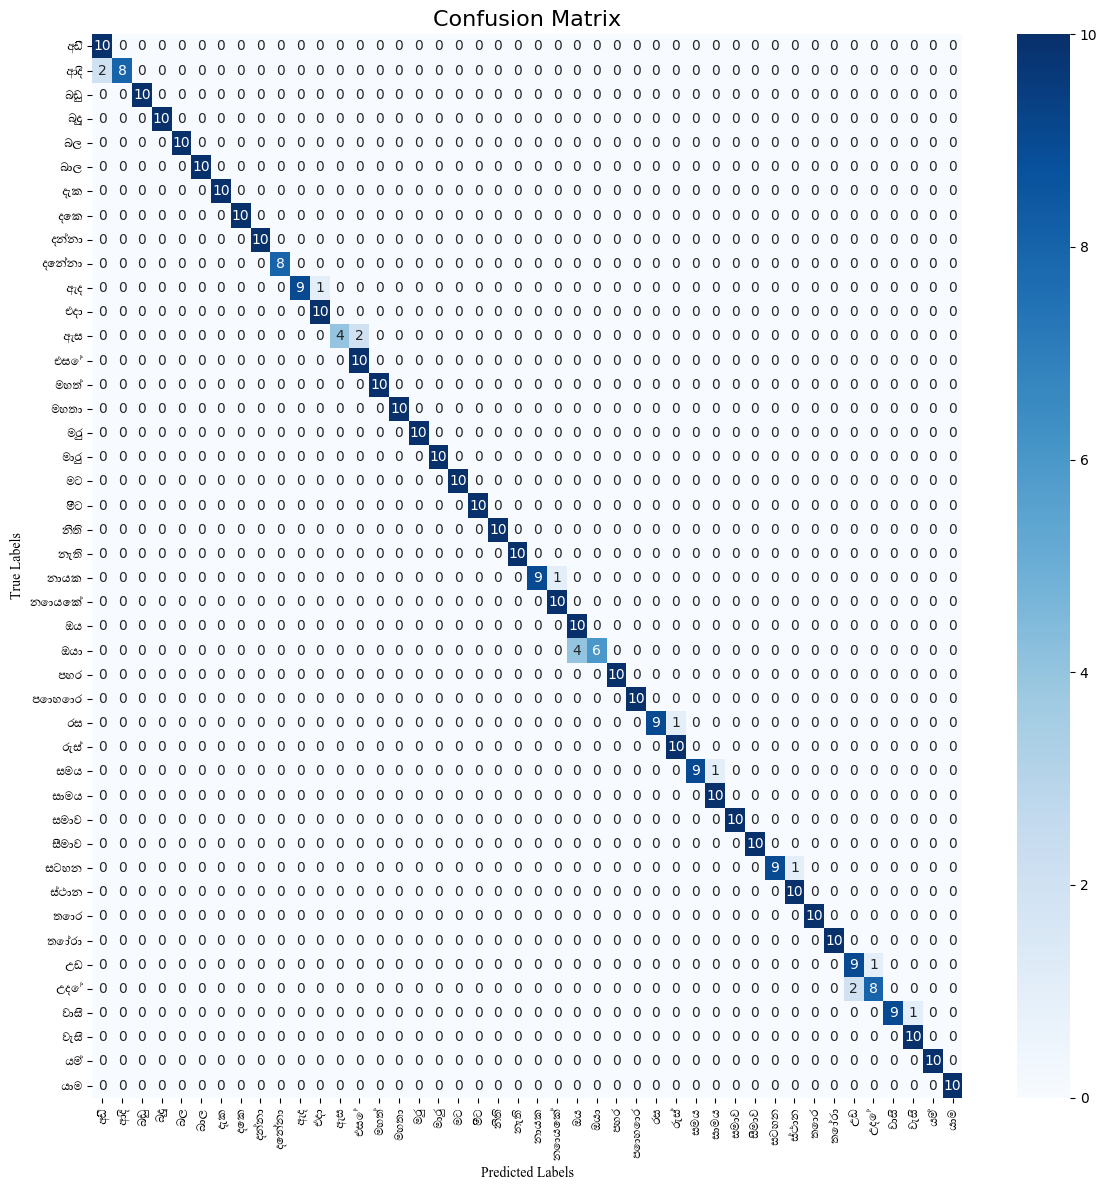

F1 Score (Macro): 0.9588
F1 Score (Weighted): 0.9601




In [ ]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/new_wsd_test_base_model_results1.xlsx')

Fine Tuned Model

findfont: Font family 'Iskoola Pota' not found.



Ground Truth Word(s): ['අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ

findfont: Font family 'Iskoola Pota' not found.
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
findfont: Font family 'Iskoola Pota' not found.
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWar

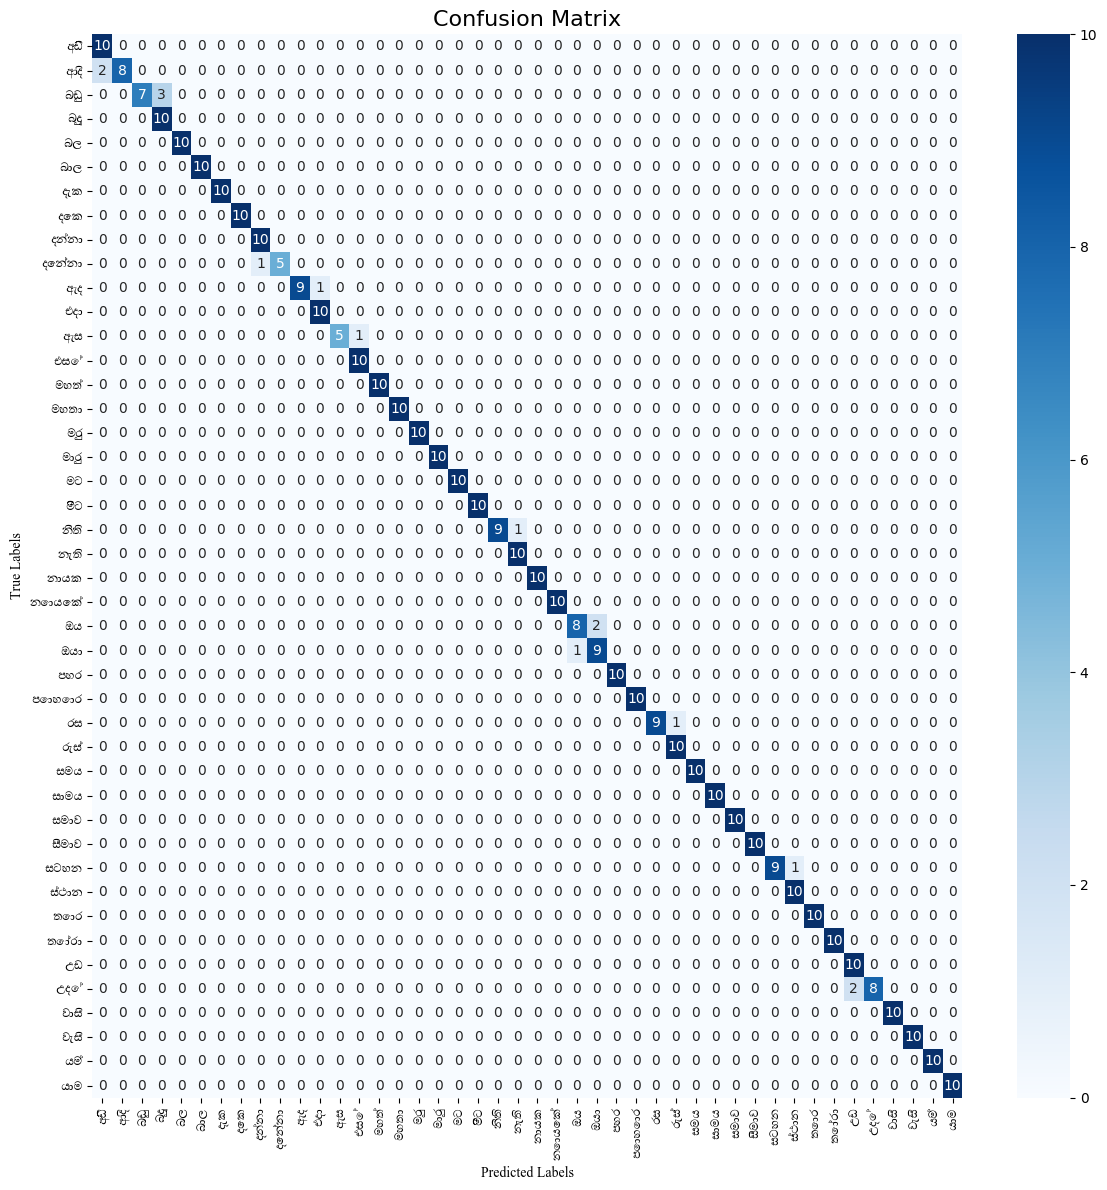

F1 Score (Macro): 0.9616
F1 Score (Weighted): 0.9626




In [ ]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/AKURU_Results/wsd_fine_tuned_model_results1.xlsx')

F1 Score for senteces with two ambiguity word sentences

Base Model


Ground Truth Word(s): ['ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බල', 'බාල', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'ඇද', 'එදා', 'එදා', 'ඇද', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇ

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.dra

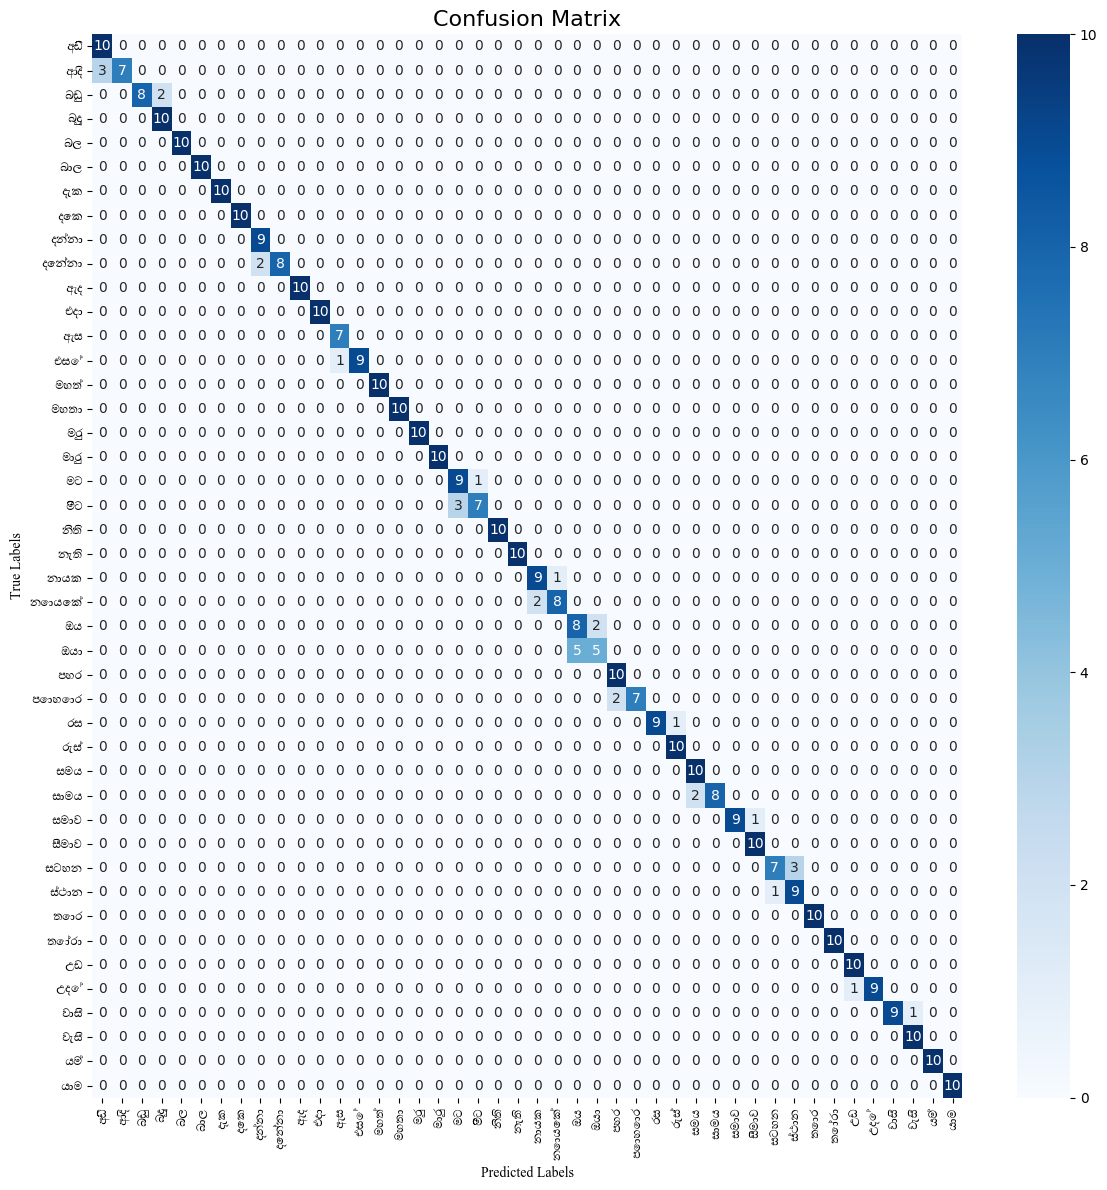

F1 Score (Macro): 0.9208
F1 Score (Weighted): 0.9209




In [30]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/AKURU_Results/wsd_base_model_results2.xlsx')

Fine Tuned Model


Ground Truth Word(s): ['ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බල', 'බාල', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'ඇද', 'එදා', 'එදා', 'ඇද', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇ

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.dra

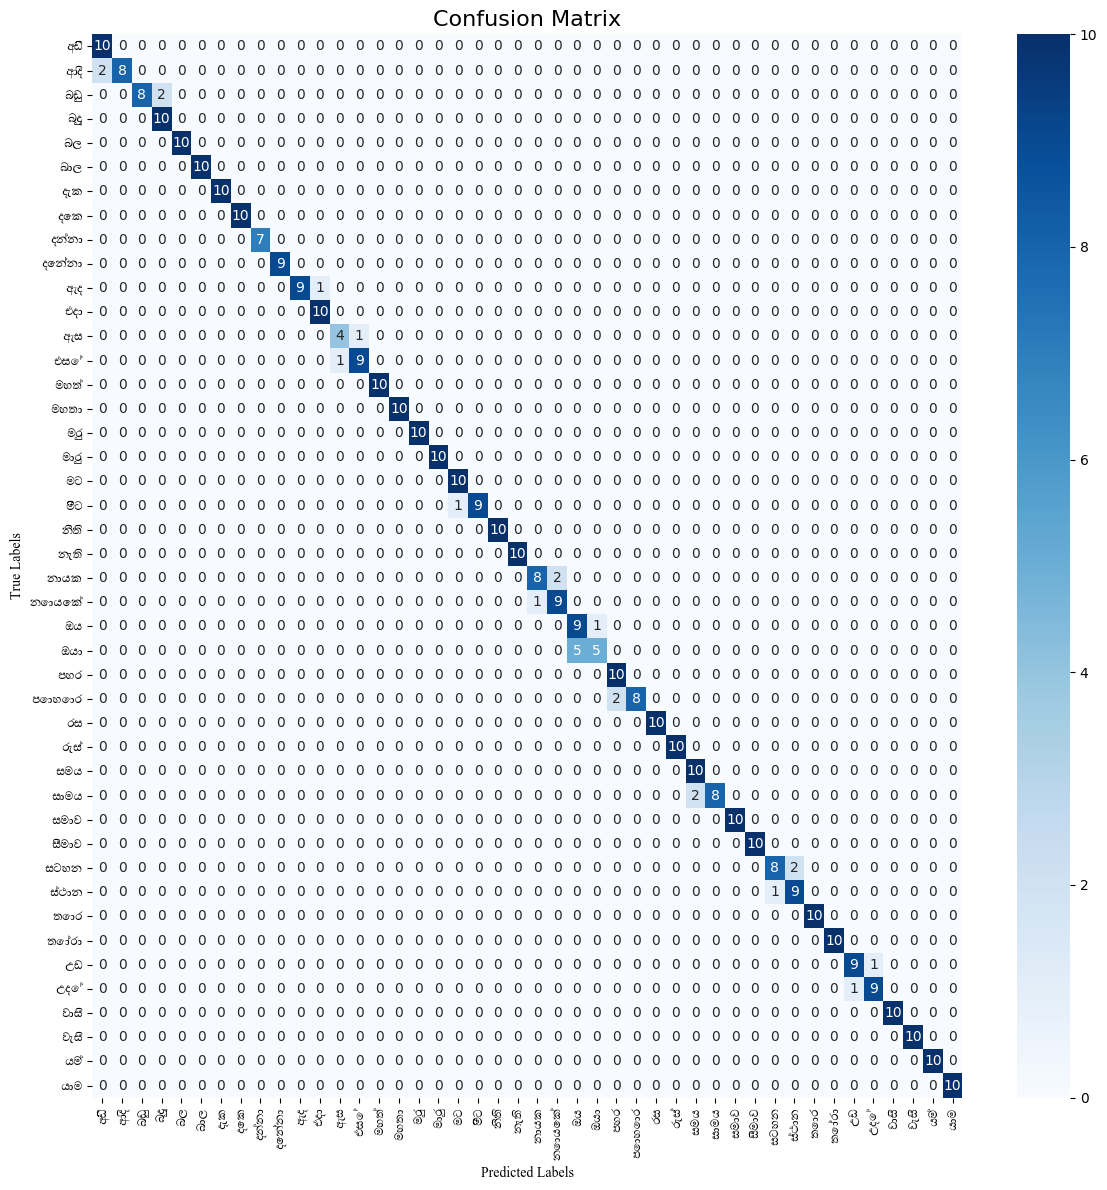

F1 Score (Macro): 0.9378
F1 Score (Weighted): 0.9389




In [31]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/WSD/AKURU_Results/wsd_fine_tuned_model_results2.xlsx')

# Benchmarking - WSD Dataset

Swa-Bhasha1

F1 Score for senteces with one ambiguity word


Ground Truth Word(s): ['අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.dra

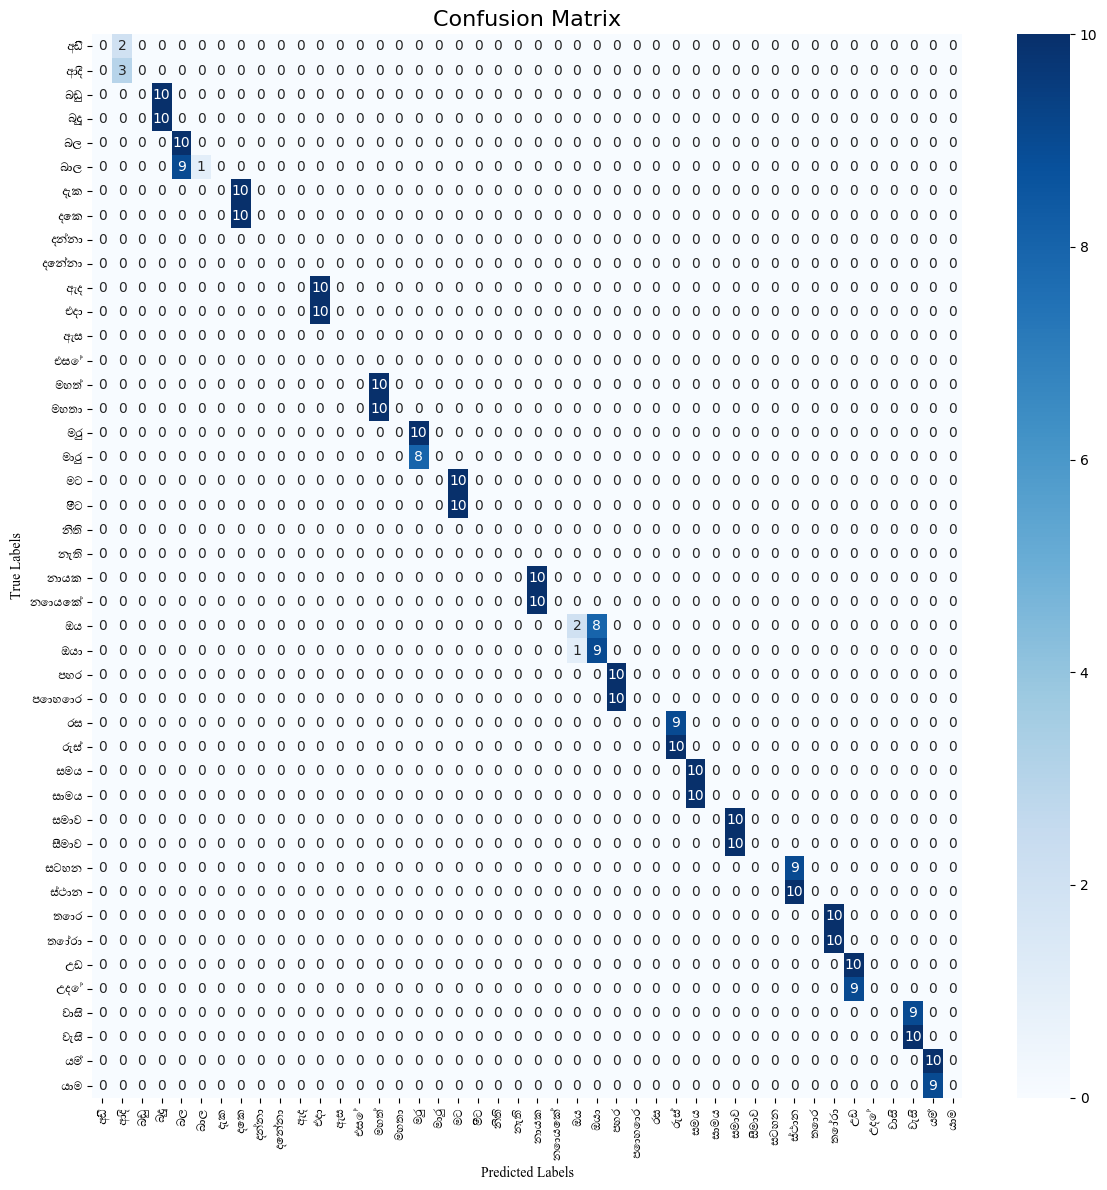

F1 Score (Macro): 0.3533
F1 Score (Weighted): 0.3603




In [19]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/WSD/Swa-Bhasha1-Deshan/Swa-Bhasha1-Deshan_results1.xlsx')

F1 Score for senteces with two ambiguity word sentences


Ground Truth Word(s): ['ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බල', 'බාල', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'ඇද', 'එදා', 'එදා', 'ඇද', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇ

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.dra

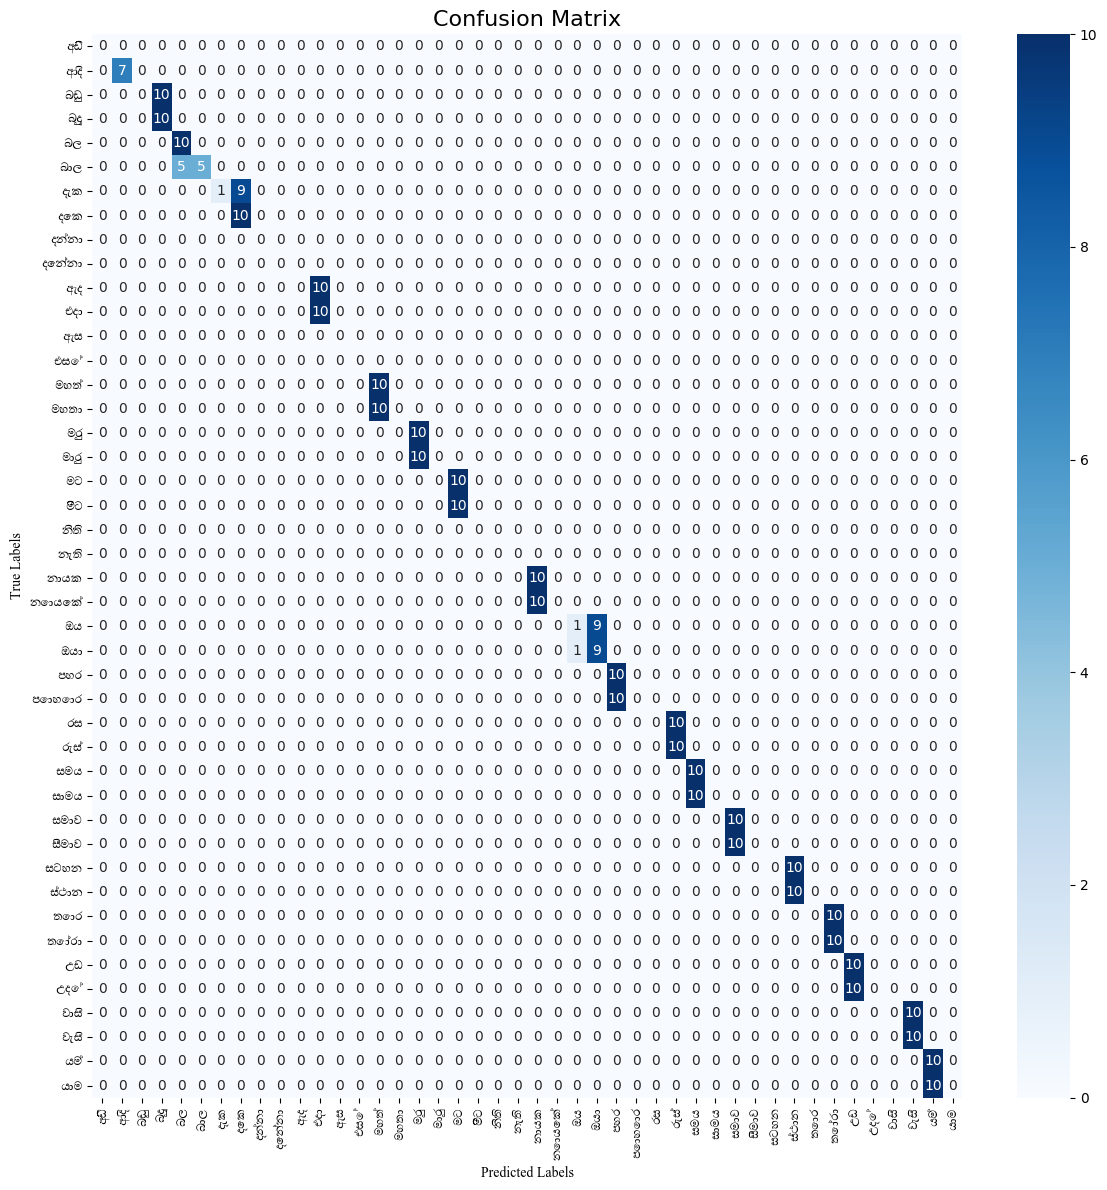

F1 Score (Macro): 0.3824
F1 Score (Weighted): 0.3773




In [25]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/WSD/Swa-Bhasha1-Deshan/Swa-Bhasha1-Deshan_results2.xlsx')

Rule-Based (Swa-Bhasha Dataset)

F1 Score for senteces with one ambiguity word


Ground Truth Word(s): ['අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'අඩි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'ආදි', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බදු', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'බාල', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දැක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දෙක', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'දෙන්නා', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'ඇද', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'එදා', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'ඇස', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ', 'එසේ

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.dra

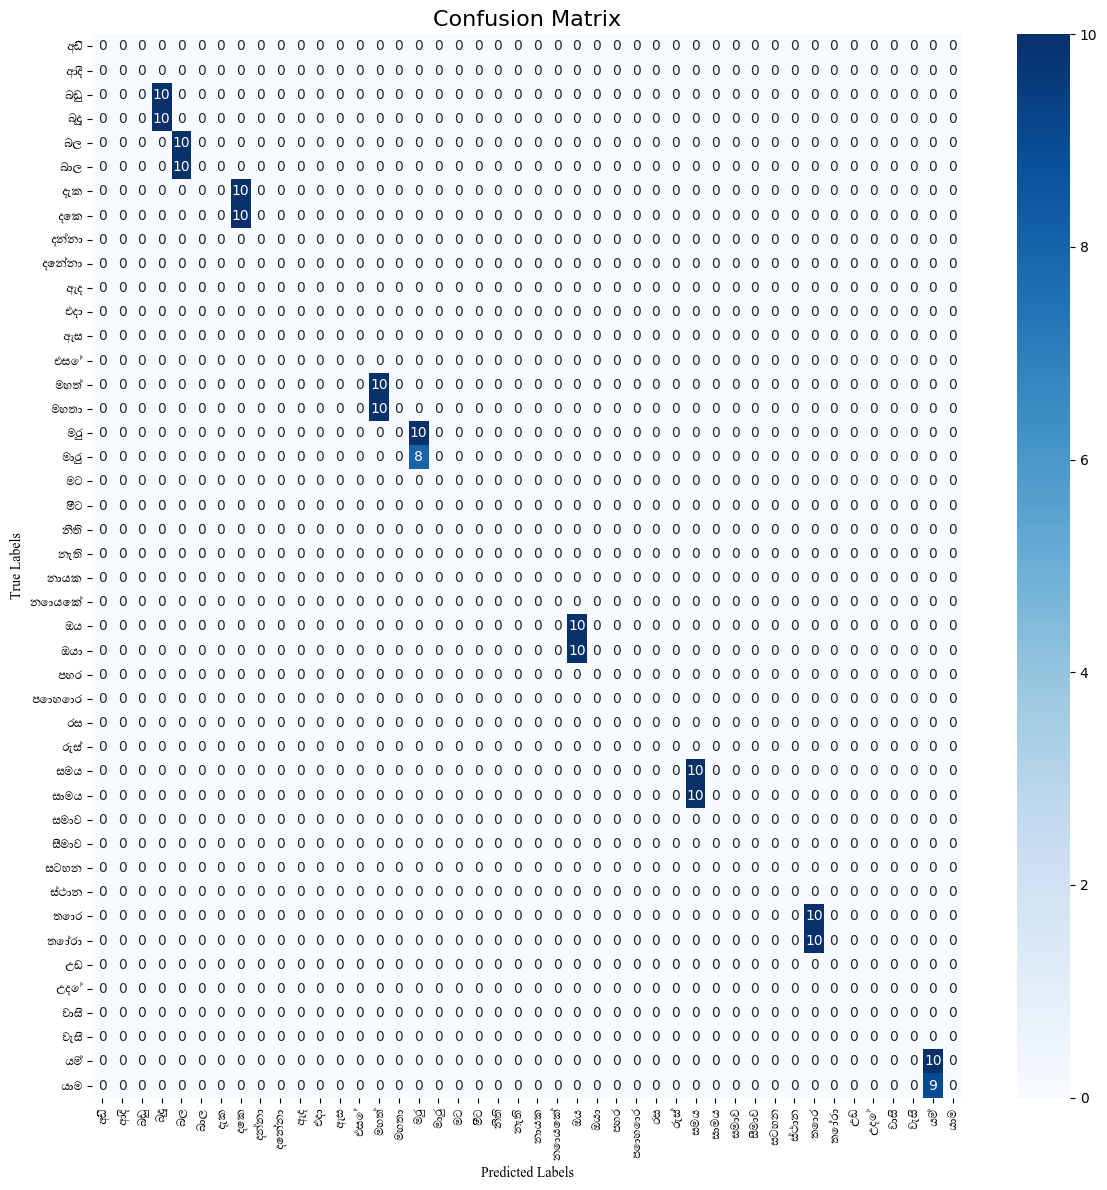

F1 Score (Macro): 0.3373
F1 Score (Weighted): 0.3430




In [21]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/WSD/Swa-Bhasha-Dataset-Rule-Base/Swa-Bhasha-Dataset-Rule-Base_results1.xlsx')

F1 Score for senteces with two ambiguity word sentences


Ground Truth Word(s): ['ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'ආදි', 'අඩි', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බඩු', 'බදු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බදු', 'බඩු', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බාල', 'බල', 'බාල', 'බල', 'බාල', 'බල', 'බල', 'බාල', 'බල', 'බාල', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙක', 'දැක', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'දන්නා', 'දෙන්නා', 'දන්නා', 'දෙන්නා', 'දෙන්නා', 'දන්නා', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇද', 'ඇද', 'එදා', 'එදා', 'ඇද', 'ඇද', 'එදා', 'ඇද', 'එදා', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇස', 'එසේ', 'ඇ

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3461 (\N{SINHALA LETTER AYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Sinhala natively.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3497 (\N{SINHALA LETTER ALPAPRAANA DDAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3538 (\N{SINHALA VOWEL SIGN KETTI IS-PILLA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3462 (\N{SINHALA LETTER AAYANNA}) missing from font(s) DejaVu Sans.
  fig.canvas.dra

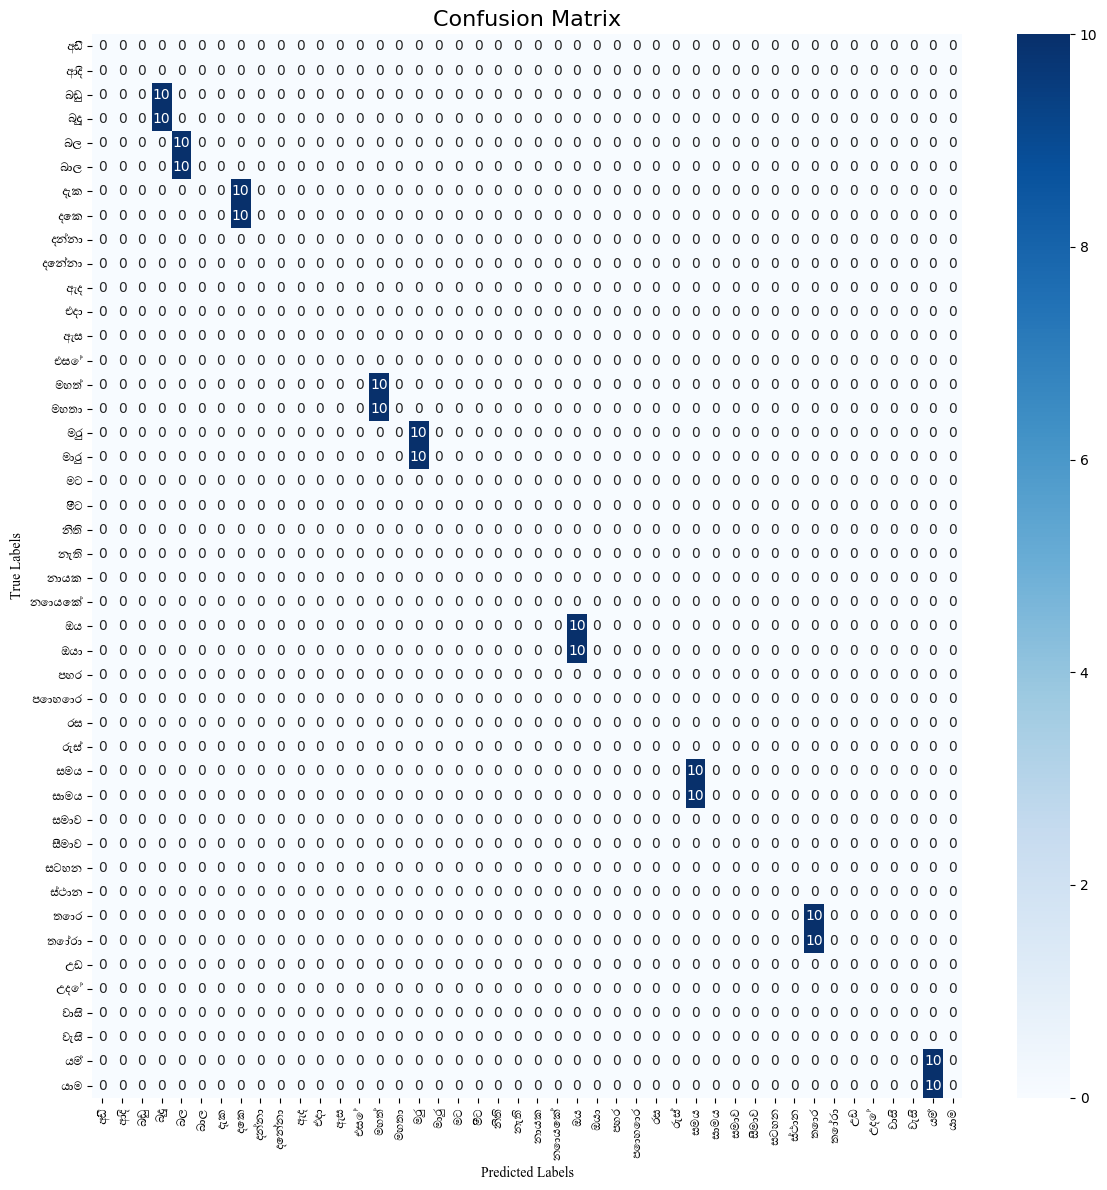

F1 Score (Macro): 0.3333
F1 Score (Weighted): 0.3333




In [22]:
calculate_f1_score('E:/4th Year/FYP/IMPLEMENTATION/tests/Benchmarking/WSD/Swa-Bhasha-Dataset-Rule-Base/Swa-Bhasha-Dataset-Rule-Base_results2.xlsx')